<h1>A LOOK AT ECONOMIC DATA TO PREDICT INFLATION RATE</h1>

This notebook takes a look at data used to determine inflation rate in the country of Botswana. The data was collected from the Central Bank of Botswana website as well as the SA Stats website. It consists of Botswana's daily inflation rates, exchange rates, and interest rates imposed by the central bank. In addition, South Africa's inflation rates data was also collected from the SA Stats website. The goal of the project is to understand better what factors affect inflation rate as well as to what degree they affect it. We also would like to see if we can predict inflation rate with good accuracy using a time series model and various machine learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>LOADING OF THE DATAFRAMES INTO THE NOTEBOOK</h3>

In [3]:
dfinterest = pd.read_csv('..\Data\interestrates.csv')
dfexchange= pd.read_csv('..\Data\exchangerates.csv')
dfinflation = pd.read_csv('..\Data\inflationrates.csv')

<h4>Loading Interest Data DataFrame</h4>

In [4]:
dfinterest.head()

,Interest Rate Date,7 Day Bobc,Monetary Policy Rate,1 Month BoBC
0,02 Sep 2022,2.65,2.65,2.43
1,01 Sep 2022,2.65,2.65,2.43
2,31 Aug 2022,2.65,2.65,2.43
3,30 Aug 2022,2.15,2.65,2.43
4,29 Aug 2022,2.15,2.65,2.43


In [5]:
dfinterest.shape

(4476, 4)

<h4>Loading Exchange Rate Data DataFrame</h4>

In [6]:
dfexchange.head()

,Date,CHN,EUR,GBP,USD,SDR,YEN,ZAR
0,02 Sep 2022,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355
1,01 Sep 2022,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333
2,31 Aug 2022,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234
3,30 Aug 2022,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191
4,29 Aug 2022,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216


In [7]:
dfexchange.shape

(5378, 8)

<h4>Loading Inflation Rate Data DataFrame</h4>

In [8]:
dfinflation.head()

,CPI,CPIT,CPIXA,field_inflations_date
0,14.3,11.5,7.6,Jul 2022
1,12.7,10.3,6.6,Jun 2022
2,11.9,9.4,6.4,May 2022
3,9.6,8.1,5.9,Apr 2022
4,10.0,8.6,6.8,Mar 2022


In [9]:
dfinflation.shape

(283, 4)

<h3>A closer look at Inflation Data</h3>

The Data consists of CPI, CPIT, CPIXA which are all measures of consumer price index. The data also has a date column and should be able to be represented as a time series.

The data is from March 1999 to July 2022 which is approximately 23 years. The current monetary policy framework which includes an inflation rate objective of 3 - 6%, was introduced around 2008. Based on this, the inflation data for this project will be limited to data starting from 2008. One could decide to use all the data in another project beyond this one.

Features will be dropped based on date. In order to do this, the date column is going to be set as the index for the DataFrame.

In [10]:
#Renaming column with date to 'date' and setting it as the index for the DataFrame
dfinflation.rename(columns={'field_inflations_date':'date'}, inplace=True)

dfinflation['date'] = pd.to_datetime(dfinflation['date'])

dfinflation.set_index('date', inplace=True)

In [11]:
#Deleting all entries prior to 2008
dfinflation = dfinflation.loc['01-01-2008':]

In [12]:
dfinflation

,CPI,CPIT,CPIXA
date,,,
2022-07-01,14.3,11.5,7.6
2022-06-01,12.7,10.3,6.6
2022-05-01,11.9,9.4,6.4
2022-04-01,9.6,8.1,5.9
2022-03-01,10.0,8.6,6.8
...,...,...,...
2008-07-01,15.0,12.7,11.1
2008-02-01,9.0,8.7,8.6
2008-03-01,9.8,9.7,8.9


In [13]:
dfinflation.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2022-07-01 to 2008-01-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     175 non-null    float64
 1   CPIT    175 non-null    float64
 2   CPIXA   175 non-null    float64
dtypes: float64(3)
memory usage: 5.5 KB


There are no missing values once the data is trimmed to start from January 2008. There is a total of 175 entries.

<h3>Interest Rate Data</h3>

Unlike inflation data, interest rate data is recorded on a daily basis with data all the way upto 2004. The data will be limited to January 2008 just like with the inflation data. Note that the Bobc 7 days is a security provided by the Bank of Botswana at an interest rate decided by them. The security takes 7 days to mature. The Bobc 1 Month takes 1 month to reach maturity.

In [14]:
dfinterest

,Interest Rate Date,7 Day Bobc,Monetary Policy Rate,1 Month BoBC
0,02 Sep 2022,2.65,2.65,2.43
1,01 Sep 2022,2.65,2.65,2.43
2,31 Aug 2022,2.65,2.65,2.43
3,30 Aug 2022,2.15,2.65,2.43
4,29 Aug 2022,2.15,2.65,2.43
...,...,...,...,...
4471,23 Nov 2004,9.90,NaN,NaN
4472,24 Nov 2004,9.90,NaN,NaN
4473,16 Nov 2004,11.98,NaN,NaN
4474,17 Nov 2004,11.98,NaN,NaN


In [15]:
#Renaming column with date to 'date' and setting it as the index for the DataFrame
dfinterest.rename(columns={'Interest Rate Date':'date'}, inplace=True)

dfinterest['date'] = pd.to_datetime(dfinterest['date'])

dfinterest.set_index('date', inplace=True)

In [16]:
#Deleting all entries prior to 2008
dfinterest = dfinterest.loc['01-01-2008':]

C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\3375821857.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfinterest = dfinterest.loc['01-01-2008':]


In [17]:
dfinterest

,7 Day Bobc,Monetary Policy Rate,1 Month BoBC
date,,,
2022-09-02,2.65,2.65,2.43
2022-09-01,2.65,2.65,2.43
2022-08-31,2.65,2.65,2.43
2022-08-30,2.15,2.65,2.43
2022-08-29,2.15,2.65,2.43
...,...,...,...
2008-01-14,11.97,NaN,NaN
2008-01-03,11.96,NaN,NaN
2008-01-04,11.96,NaN,NaN


In [18]:
dfinterest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3667 entries, 2022-09-02 to 2008-01-08
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   7 Day Bobc            3667 non-null   float64
 1   Monetary Policy Rate  84 non-null     float64
 2   1 Month BoBC          33 non-null     float64
dtypes: float64(3)
memory usage: 114.6 KB


With this dataset, only the 7 Day Bobc is recorded daily. The other two fields (Monetary Policy Rate and 1 Month BoBC) have very few records in comparison.

In [19]:
dfinterest.head(60)

,7 Day Bobc,Monetary Policy Rate,1 Month BoBC
date,,,
2022-09-02,2.65,2.65,2.43
2022-09-01,2.65,2.65,2.43
2022-08-31,2.65,2.65,2.43
2022-08-30,2.15,2.65,2.43
2022-08-29,2.15,2.65,2.43
2022-08-26,2.15,2.15,2.43
2022-08-25,2.15,2.15,2.43
2022-08-24,2.15,2.15,2.43
2022-08-23,2.15,2.15,2.44


The Bobc 7 days rate and the monetary policy rate are the same for most records where the monetary policy rate exists. There are only 84 monetary policy rate records compared to the 3667 records of the 7 day bobc rates. Based on the fact that the two fields are mostly similar and the monetary policy rate column is very small, a decision is made to drop the monetary policy rate field.

For the 1 month BoBc, the records are even fewer at 33. But the difference is the values are definitely different from those of the Bobc 7 days. Since they are a bit different, bobc 1 month records will be kept with the missing values replaced by 0. But they could still be deleted altogether farther down the road of this analysis.

In [20]:
# Deleting the column for Monetary Policy Rate
dfinterest.drop('Monetary Policy Rate', axis=1, inplace=True)

In [21]:
# Filling the missing values for column bobc 1 month with zeros (Remember: There were no missing values for 7 Day Bobc)
dfinterest.fillna(0, inplace=True)

In [22]:
dfinterest.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3667 entries, 2022-09-02 to 2008-01-08
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3667 non-null   float64
 1   1 Month BoBC  3667 non-null   float64
dtypes: float64(2)
memory usage: 85.9 KB


<h3>Exchange Rates Data</h3>

Exchange Rates Data available consists of exchange rates for pula to Chinese YUAN, Euro, British Pound, US Dollars, SPECIAL DRAWING RIGHTS, Japanese YEN, AND THE SOUTH AFRICAN RAND.

Fluctuations in this data is known to have an effect on inflation. Lets take a quick look at the data

In [23]:
dfexchange

,Date,CHN,EUR,GBP,USD,SDR,YEN,ZAR
0,02 Sep 2022,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355
1,01 Sep 2022,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333
2,31 Aug 2022,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234
3,30 Aug 2022,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191
4,29 Aug 2022,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216
...,...,...,...,...,...,...,...,...
5373,23 Apr 2009,0.0000,0.1027,0.0919,0.1339,0.0901,13.13,1.1929
5374,22 Apr 2009,0.0000,0.1027,0.0907,0.1329,0.0897,13.08,1.1972
5375,29 Apr 2009,0.0000,0.1037,0.0930,0.1368,0.0915,13.25,1.1804
5376,28 Apr 2009,0.0000,0.1034,0.0924,0.1346,0.0904,12.90,1.1902


In [24]:
dfexchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5378 entries, 0 to 5377
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5378 non-null   object 
 1   CHN     5378 non-null   float64
 2   EUR     5378 non-null   float64
 3   GBP     5378 non-null   float64
 4   USD     5378 non-null   float64
 5   SDR     5378 non-null   float64
 6   YEN     5378 non-null   float64
 7   ZAR     5378 non-null   float64
dtypes: float64(7), object(1)
memory usage: 336.2+ KB


Once again, the data is on a daily basis but it only begins from April 2009. This means there would be a lot of missing values. A farther analysis will be made to see how these missing values can be addressed. As before, the date will be set as the index for the DataFrame.

In [25]:
#Renaming column with date to 'date' and setting it as the index for the DataFrame
dfexchange.rename(columns={'Date':'date'}, inplace=True)

dfexchange['date'] = pd.to_datetime(dfexchange['date'])

dfexchange.set_index('date', inplace=True)

Perhaps we can replace the missing values with the average for 2009-2010. Assuming there are not too many outliers. Lets see the distribution of the values for 2009-2010

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:770: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end_casted = self._maybe_cast_slice_bound(end, "right")
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\3831437251.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfexchange.loc['01-04-2009':'31-12-2009'].boxplot()


<AxesSubplot:>

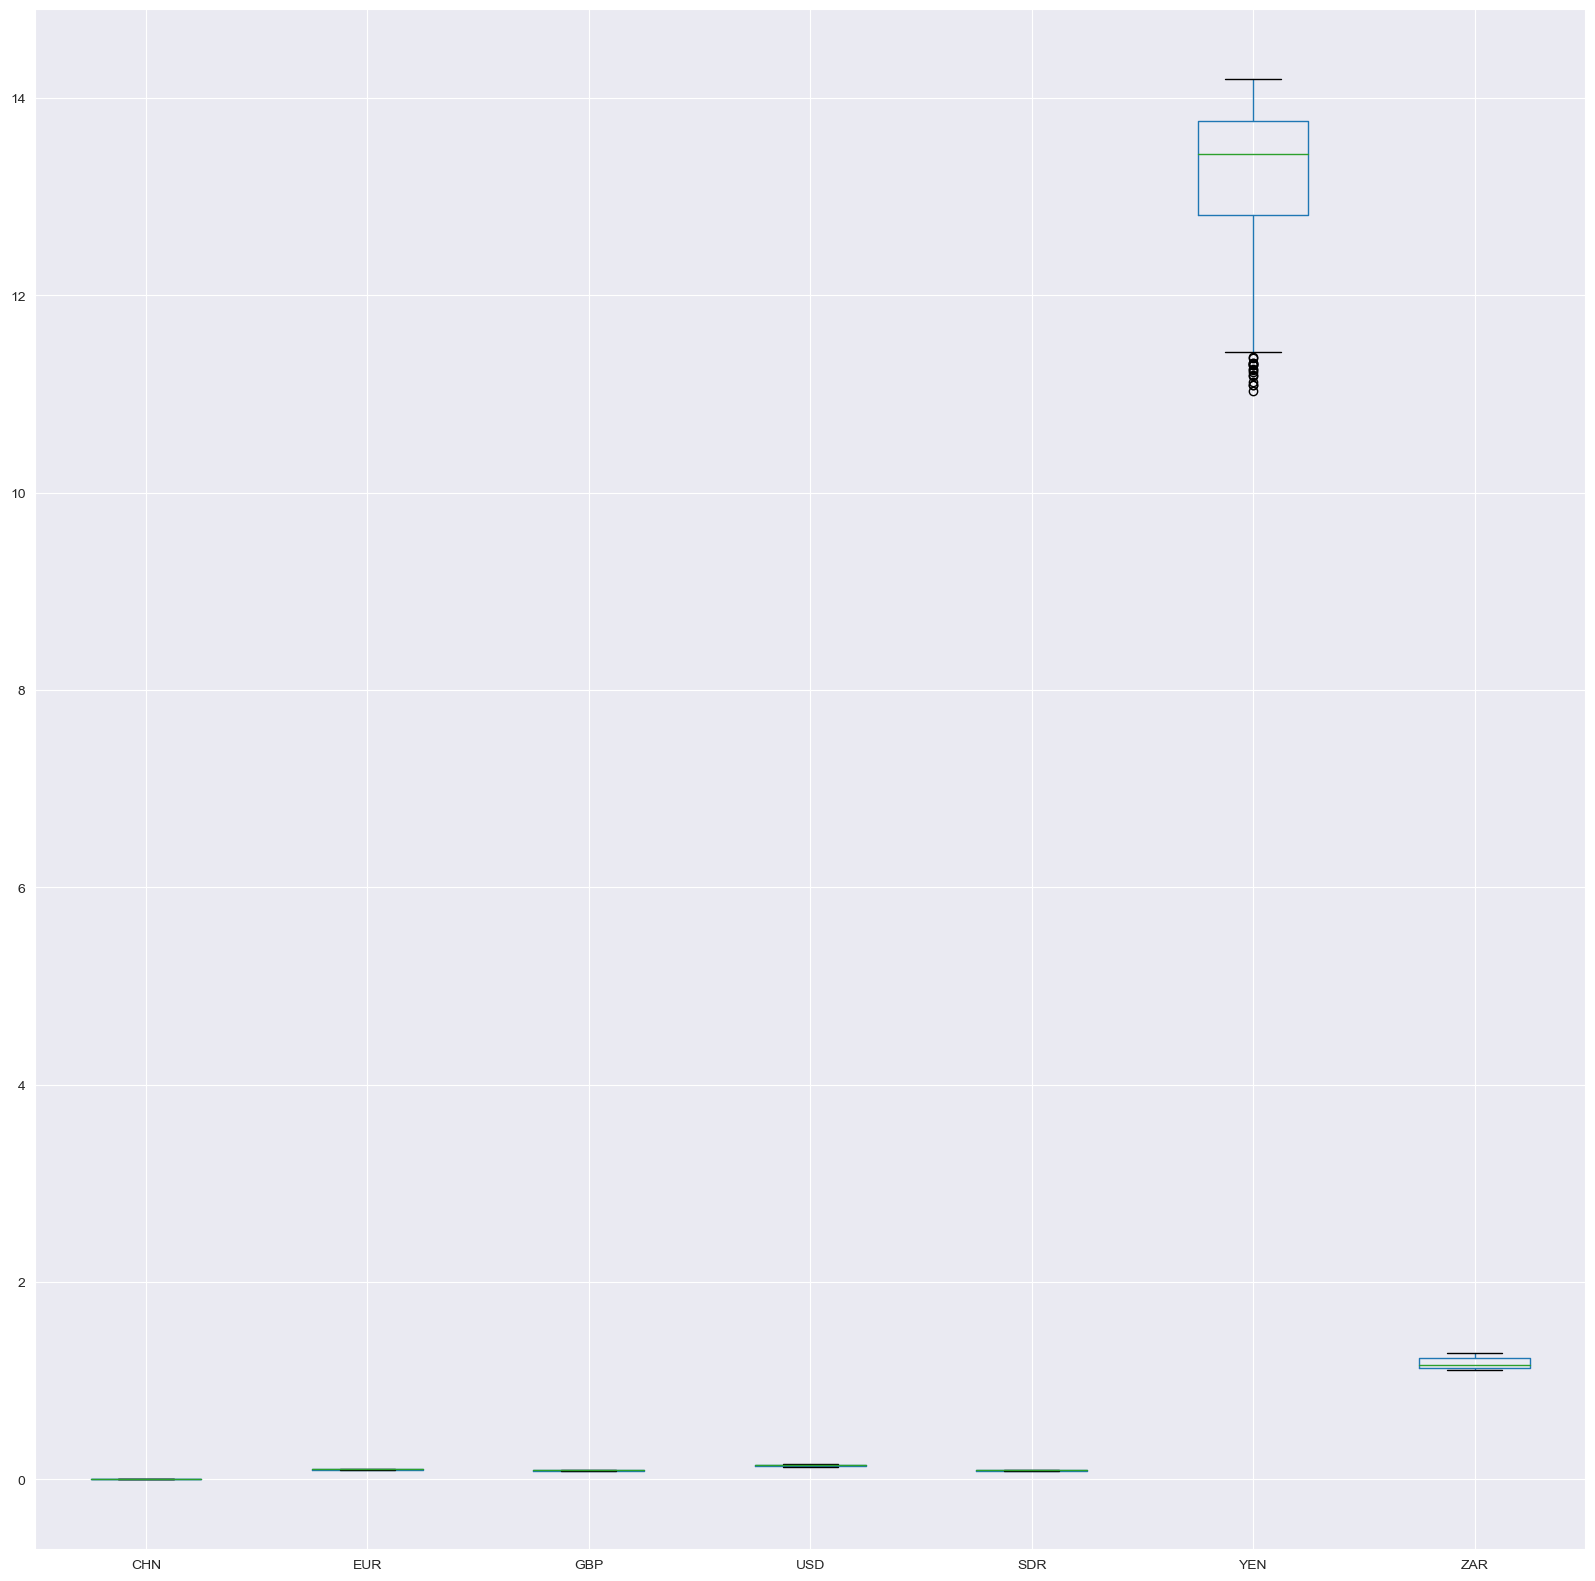

In [26]:
plt.figure(figsize=(20,20))
dfexchange.loc['01-04-2009':'31-12-2009'].boxplot()



Most of the entries dont vary much with the Japanese Yen having the largest variance. Lets see the basic statistics for the dataset.

In [27]:
dfexchange.loc['01-04-2009':'31-12-2009'].describe()

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:770: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end_casted = self._maybe_cast_slice_bound(end, "right")
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\950275893.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfexchange.loc['01-04-2009':'31-12-2009'].describe()


,CHN,EUR,GBP,USD,SDR,YEN,ZAR
count,248.0,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,0.0,0.100726,0.089723,0.140546,0.091038,13.127500,1.175903
std,0.0,0.002667,0.002385,0.009829,0.004191,0.846766,0.051920
min,0.0,0.094300,0.084700,0.120000,0.082300,11.030000,1.108600
25%,0.0,0.098575,0.087900,0.131700,0.087100,12.812500,1.130075
50%,0.0,0.101500,0.089700,0.143850,0.092800,13.430000,1.158900
75%,0.0,0.102725,0.091400,0.149025,0.094325,13.762500,1.230450
max,0.0,0.105200,0.096500,0.153900,0.096400,14.190000,1.277600


It can be seen as expected that the YEN has by far the highest standard deviation of 0.85. All other fields have a standard deviation less than 0.05. Nevertheless, the mean of the entries in 2009 will be used to fill missing values upto 2008. 

This will be done once the datasets have been merged.

<h3>Merging the Datasets</h3>

The datasets for inflation, exchange rates and interest rates are now ready to be merged based on date. The challenge will be that inflation is recorded monthly while exchange rates and interest rates are recorded daily. 

The approach will be to fill the inflation dataset with the previous recorded inflation (Backfill).

In [28]:
df = dfinterest.merge(dfexchange, on='date', how='outer')

In [29]:
df = df.merge(dfinflation, on='date', how='outer')

In [30]:
df

,7 Day Bobc,1 Month BoBC,CHN,EUR,GBP,USD,SDR,YEN,ZAR,CPI,CPIT,CPIXA
date,,,,,,,,,,,,
2022-09-02,2.65,2.43,0.5340,0.0775,0.0670,0.0772,0.0595,10.84,1.3355,NaN,NaN,NaN
2022-09-01,2.65,2.43,0.5359,0.0774,0.0670,0.0775,0.0596,10.80,1.3333,NaN,NaN,NaN
2022-08-31,2.65,2.43,0.5395,0.0779,0.0669,0.0782,0.0599,10.82,1.3234,NaN,NaN,NaN
2022-08-30,2.15,2.43,0.5420,0.0783,0.0669,0.0783,0.0601,10.85,1.3191,NaN,NaN,NaN
2022-08-29,2.15,2.43,0.5405,0.0785,0.0669,0.0780,0.0600,10.83,1.3216,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,11.0,9.1
2008-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,12.5,9.8
2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,12.7,11.1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3670 non-null   float64
 1   1 Month BoBC  3670 non-null   float64
 2   CHN           5384 non-null   float64
 3   EUR           5384 non-null   float64
 4   GBP           5384 non-null   float64
 5   USD           5384 non-null   float64
 6   SDR           5384 non-null   float64
 7   YEN           5384 non-null   float64
 8   ZAR           5384 non-null   float64
 9   CPI           175 non-null    float64
 10  CPIT          175 non-null    float64
 11  CPIXA         175 non-null    float64
dtypes: float64(12)
memory usage: 559.3 KB


In [32]:
df.isnull().sum()

7 Day Bobc      1837
1 Month BoBC    1837
CHN              123
EUR              123
GBP              123
USD              123
SDR              123
YEN              123
ZAR              123
CPI             5332
CPIT            5332
CPIXA           5332
dtype: int64

In [33]:
dfexchange.loc['01-04-2009':'31-12-2009']

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:770: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end_casted = self._maybe_cast_slice_bound(end, "right")
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\3793513023.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dfexchange.loc['01-04-2009':'31-12-2009']


,CHN,EUR,GBP,USD,SDR,YEN,ZAR
date,,,,,,,
2009-11-25,0.0,0.1011,0.0911,0.1515,0.0944,13.38,1.1245
2009-11-26,0.0,0.1011,0.0915,0.1527,0.0946,13.25,1.1227
2009-11-27,0.0,0.1002,0.0912,0.1495,0.0931,12.86,1.1341
2009-11-30,0.0,0.1012,0.0921,0.1523,0.0945,13.14,1.1230
2009-12-04,0.0,0.1007,0.0917,0.1517,0.0944,13.38,1.1231
...,...,...,...,...,...,...,...
2009-04-23,0.0,0.1027,0.0919,0.1339,0.0901,13.13,1.1929
2009-04-22,0.0,0.1027,0.0907,0.1329,0.0897,13.08,1.1972
2009-04-29,0.0,0.1037,0.0930,0.1368,0.0915,13.25,1.1804


In [34]:
df['CHN'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['CHN'].mean(), inplace=True)
df['EUR'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['EUR'].mean(), inplace=True)
df['GBP'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['GBP'].mean(), inplace=True)
df['USD'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['USD'].mean(), inplace=True)
df['SDR'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['SDR'].mean(), inplace=True)
df['YEN'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['YEN'].mean(), inplace=True)
df['ZAR'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['ZAR'].mean(), inplace=True)

C:\Users\ituser\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:770: UserWarning: Parsing '31-12-2009' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  end_casted = self._maybe_cast_slice_bound(end, "right")
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\2420668339.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['CHN'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['CHN'].mean(), inplace=True)
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\2420668339.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df['EUR'].fillna(dfexchange.loc['01-04-2009':'31-12-2009']['EUR'].mean(), inplace=True)
C:\Users\ituser\AppData\Local\Temp\ipykernel_11464\2420668339.py:3: FutureWarning: Value ba

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    3670 non-null   float64
 1   1 Month BoBC  3670 non-null   float64
 2   CHN           5507 non-null   float64
 3   EUR           5507 non-null   float64
 4   GBP           5507 non-null   float64
 5   USD           5507 non-null   float64
 6   SDR           5507 non-null   float64
 7   YEN           5507 non-null   float64
 8   ZAR           5507 non-null   float64
 9   CPI           175 non-null    float64
 10  CPIT          175 non-null    float64
 11  CPIXA         175 non-null    float64
dtypes: float64(12)
memory usage: 559.3 KB


In [36]:
# Filling missing values using forward fill (ie. for days skipped, the previous day's interest applies)
df['7 Day Bobc'].fillna(method='ffill', inplace=True)
df['1 Month BoBC'].fillna(method='ffill', inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    5507 non-null   float64
 1   1 Month BoBC  5507 non-null   float64
 2   CHN           5507 non-null   float64
 3   EUR           5507 non-null   float64
 4   GBP           5507 non-null   float64
 5   USD           5507 non-null   float64
 6   SDR           5507 non-null   float64
 7   YEN           5507 non-null   float64
 8   ZAR           5507 non-null   float64
 9   CPI           175 non-null    float64
 10  CPIT          175 non-null    float64
 11  CPIXA         175 non-null    float64
dtypes: float64(12)
memory usage: 559.3 KB


In [38]:
# Firstly a forward fill is done. Then a backward fill will be done as well for the other values
df['CPI'].fillna(method='ffill', inplace=True)
df['CPIT'].fillna(method='ffill', inplace=True)
df['CPIXA'].fillna(method='ffill', inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    5507 non-null   float64
 1   1 Month BoBC  5507 non-null   float64
 2   CHN           5507 non-null   float64
 3   EUR           5507 non-null   float64
 4   GBP           5507 non-null   float64
 5   USD           5507 non-null   float64
 6   SDR           5507 non-null   float64
 7   YEN           5507 non-null   float64
 8   ZAR           5507 non-null   float64
 9   CPI           5443 non-null   float64
 10  CPIT          5443 non-null   float64
 11  CPIXA         5443 non-null   float64
dtypes: float64(12)
memory usage: 559.3 KB


In [40]:
df['CPI'].fillna(method='bfill', inplace=True)
df['CPIT'].fillna(method='bfill', inplace=True)
df['CPIXA'].fillna(method='bfill', inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5507 entries, 2022-09-02 to 2008-01-01
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   7 Day Bobc    5507 non-null   float64
 1   1 Month BoBC  5507 non-null   float64
 2   CHN           5507 non-null   float64
 3   EUR           5507 non-null   float64
 4   GBP           5507 non-null   float64
 5   USD           5507 non-null   float64
 6   SDR           5507 non-null   float64
 7   YEN           5507 non-null   float64
 8   ZAR           5507 non-null   float64
 9   CPI           5507 non-null   float64
 10  CPIT          5507 non-null   float64
 11  CPIXA         5507 non-null   float64
dtypes: float64(12)
memory usage: 559.3 KB


All the missing values have been addressed and we have a dataset with about 5507 records.

In [42]:
df.to_csv('Economic_Data_BOB')